In [1]:
# non-linear orthogonal auto-encoder - partial.Generic (w/o EGR ANOVA) - 

In [2]:
bucket="relai.poc.data" # aws bucket for sourcing data
folder_base = '/unified_Fx_D3_power_annotated/'  # prev modules: data cleaning/sticthing, feature engineering/extraction, annotations 
csv='.csv' # presently dealing only with csv files

from d2 import get_vin_list #d2 is RelAI specific lib 
f_=get_vin_list(bucket=bucket, folder_base=folder_base, file_extn=csv) # fetches filename list from s3 location

#f_train=get_vin_list(bucket=bucket, folder_base=folder_base_train, file_extn=csv)
#path_test='s3://{}/{}{}{}'.format(bucket, folder_base_test, vin, csv)
#path_train='s3://{}/{}{}{}'.format(bucket, folder_base_train, vin, csv)

In [5]:
import pandas as pd
X_test=pd.read_csv('X_test.csv')
X_train=pd.read_csv('X_train.csv')

In [6]:
X = pd.concat([X_train,X_test])

In [10]:
col_list = ['Power_mean',
 'Power_median',
 'Power_variance',
 'Power_max',
 'Power_min',
 'Power_max-min',

 'Power_kurtosis',
 'Power_skewness',
 'engine_speed_mean',
 'engine_speed_median',
 'engine_speed_variance',
 'engine_speed_max',
 'engine_speed_min',
 'engine_speed_max-min',
 
 'engine_speed_kurtosis',
 'engine_speed_skewness',
 'VEHICAL_BATTERY_POTENTIAL_mean',
 'VEHICAL_BATTERY_POTENTIAL_median',
 'VEHICAL_BATTERY_POTENTIAL_variance',
 'VEHICAL_BATTERY_POTENTIAL_max',
 'VEHICAL_BATTERY_POTENTIAL_min',
 'VEHICAL_BATTERY_POTENTIAL_max-min',

 'VEHICAL_BATTERY_POTENTIAL_kurtosis',
 'VEHICAL_BATTERY_POTENTIAL_skewness',
 'FUEL_CONSUM_mean',
 'FUEL_CONSUM_median',
 'FUEL_CONSUM_variance',
 'FUEL_CONSUM_max',
 'FUEL_CONSUM_min',
 'FUEL_CONSUM_max-min',

 'FUEL_CONSUM_kurtosis',
 'FUEL_CONSUM_skewness',
 'THROTTLE_POS_mean',
 'THROTTLE_POS_median',
 'THROTTLE_POS_variance',
 'THROTTLE_POS_max',
 'THROTTLE_POS_min',
 'THROTTLE_POS_max-min',

 'THROTTLE_POS_kurtosis',
 'THROTTLE_POS_skewness',
 'ACTUAL_ENGINE_TORQUE_mean',
 'ACTUAL_ENGINE_TORQUE_median',
 'ACTUAL_ENGINE_TORQUE_variance',
 'ACTUAL_ENGINE_TORQUE_max',
 'ACTUAL_ENGINE_TORQUE_min',
 'ACTUAL_ENGINE_TORQUE_max-min',

 'ACTUAL_ENGINE_TORQUE_kurtosis',
 'ACTUAL_ENGINE_TORQUE_skewness',
 'ENGINE_OIL_TEMP_mean',
 'ENGINE_OIL_TEMP_median',
 'ENGINE_OIL_TEMP_variance',
 'ENGINE_OIL_TEMP_max',
 'ENGINE_OIL_TEMP_min',
 'ENGINE_OIL_TEMP_max-min',

 'ENGINE_OIL_TEMP_kurtosis',
 'ENGINE_OIL_TEMP_skewness',
 'ENGINE_INTAKE_M_PRESSURE_mean',
 'ENGINE_INTAKE_M_PRESSURE_median',
 'ENGINE_INTAKE_M_PRESSURE_variance',
 'ENGINE_INTAKE_M_PRESSURE_max',
 'ENGINE_INTAKE_M_PRESSURE_min',
 'ENGINE_INTAKE_M_PRESSURE_max-min',

 'ENGINE_INTAKE_M_PRESSURE_kurtosis',
 'ENGINE_INTAKE_M_PRESSURE_skewness',
 'ENGINE_INTAKE_M_TEMPERATURE_mean',
 'ENGINE_INTAKE_M_TEMPERATURE_median',
 'ENGINE_INTAKE_M_TEMPERATURE_variance',
 'ENGINE_INTAKE_M_TEMPERATURE_max',
 'ENGINE_INTAKE_M_TEMPERATURE_min',
 'ENGINE_INTAKE_M_TEMPERATURE_max-min',

 'ENGINE_INTAKE_M_TEMPERATURE_kurtosis',
 'ENGINE_INTAKE_M_TEMPERATURE_skewness',
 'ENGINE_AIR_INLET_PRESSURE_mean',
 'ENGINE_AIR_INLET_PRESSURE_median',
 'ENGINE_AIR_INLET_PRESSURE_variance',
 'ENGINE_AIR_INLET_PRESSURE_max',
 'ENGINE_AIR_INLET_PRESSURE_min',
 'ENGINE_AIR_INLET_PRESSURE_max-min',

 'ENGINE_AIR_INLET_PRESSURE_kurtosis',
 'ENGINE_AIR_INLET_PRESSURE_skewness',
 'AMBIENT_AIR_TEMP_mean',
 'AMBIENT_AIR_TEMP_median',
 'AMBIENT_AIR_TEMP_variance',
 'AMBIENT_AIR_TEMP_max',
 'AMBIENT_AIR_TEMP_min',
 'AMBIENT_AIR_TEMP_max-min',
 
 'AMBIENT_AIR_TEMP_kurtosis',
 'AMBIENT_AIR_TEMP_skewness',
 'ENGINE_FUEL_TEMP_1_mean',
 'ENGINE_FUEL_TEMP_1_median',
 'ENGINE_FUEL_TEMP_1_variance',
 'ENGINE_FUEL_TEMP_1_max',
 'ENGINE_FUEL_TEMP_1_min',
 'ENGINE_FUEL_TEMP_1_max-min',

 'ENGINE_FUEL_TEMP_1_kurtosis',
 'ENGINE_FUEL_TEMP_1_skewness',
 'BAT_CHARGING_CURRENT_mean',
 'BAT_CHARGING_CURRENT_median',
 'BAT_CHARGING_CURRENT_variance',
 'BAT_CHARGING_CURRENT_max',
 'BAT_CHARGING_CURRENT_min',
 'BAT_CHARGING_CURRENT_max-min',

 'BAT_CHARGING_CURRENT_kurtosis',
 'BAT_CHARGING_CURRENT_skewness',
 'ENGINE_OIL_PRESSURE_mean',
 'ENGINE_OIL_PRESSURE_median',
 'ENGINE_OIL_PRESSURE_variance',
 'ENGINE_OIL_PRESSURE_max',
 'ENGINE_OIL_PRESSURE_min',
 'ENGINE_OIL_PRESSURE_max-min',
 
 'ENGINE_OIL_PRESSURE_kurtosis',
 'ENGINE_OIL_PRESSURE_skewness',
 'AIR_PRESSURE_1_mean',
 'AIR_PRESSURE_1_median',
 'AIR_PRESSURE_1_variance',
 'AIR_PRESSURE_1_max',
 'AIR_PRESSURE_1_min',
 'AIR_PRESSURE_1_max-min',

 'AIR_PRESSURE_1_kurtosis',
 'AIR_PRESSURE_1_skewness',
 'AIR_PRESSURE_2_mean',
 'AIR_PRESSURE_2_median',
 'AIR_PRESSURE_2_variance',
 'AIR_PRESSURE_2_max',
 'AIR_PRESSURE_2_min',
 'AIR_PRESSURE_2_max-min',

 'AIR_PRESSURE_2_kurtosis',
 'AIR_PRESSURE_2_skewness',
 'AIR_PRESSURE_DIGITAL_mean',
 'AIR_PRESSURE_DIGITAL_median',
 'AIR_PRESSURE_DIGITAL_variance',
 'AIR_PRESSURE_DIGITAL_max',
 'AIR_PRESSURE_DIGITAL_min',
 'AIR_PRESSURE_DIGITAL_max-min',
 
 'AIR_PRESSURE_DIGITAL_kurtosis',
 'AIR_PRESSURE_DIGITAL_skewness',
 'ENG_OIL_DIGITAL_mean',
 'ENG_OIL_DIGITAL_median',
 'ENG_OIL_DIGITAL_variance',
 'ENG_OIL_DIGITAL_max',
 'ENG_OIL_DIGITAL_min',
 'ENG_OIL_DIGITAL_max-min',
 
 'ENG_OIL_DIGITAL_kurtosis',
 'ENG_OIL_DIGITAL_skewness',
 'eng_coolant_temp_mean',
 'eng_coolant_temp_median',
 'eng_coolant_temp_variance',
 'eng_coolant_temp_max',
 'eng_coolant_temp_min',
 'eng_coolant_temp_max-min',

 'eng_coolant_temp_kurtosis',
 'eng_coolant_temp_skewness',
 'distance_idle%',
 'distance_overrun%',
 'distance_decel%',
 'distance_accel%',
 'time_idle%',
 'time_overrun%',
 'time_decel%',
 'time_accel%',
 '5409',
 '535',
 '525569',
 '6912',
 '5888',
 '6144',
 '131363',
 '131619',
 '8501',
 '5688',
 '262288',
 '131895',
 '4386',
 '69888',
 '5169',
 '4356',
 '4406',
 '131906',
 '267048',
 'total',
 '22',
 '4377',
 '408',
 '267012',
 '4390',
 '9502',
 '4369',
 '1315',
 '4371',
 '65939',
 '4613',
 '1028',
 '1025',
 '1030',
 '1156',
 '4614',
 '66104',
 '1159',
 '65816',
 '275',
 '1344',
 '5376',
 '1316',
 '4374',
 '66370',
 '267024',
 '537',
 '663',
 '9501',
 '70434',
 '267042',
 '257',
 '295',
 '6657',
 '131352',
 '5120',
 '6400',
 '66359',
 '1026',
 '4626',
 '1314',
 '267060',
 '4385',
 '5696',
 '4612',
 '533',
 '5634',
 '4375',
 '5159',
 '74065']

In [11]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(234)

import sklearn
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
import scipy

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint

In [8]:
tf.__version__

'1.15.0'

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train[col_list])

X_train_scaled = scaler.transform(X_train[col_list])
X_test_scaled = scaler.transform(X_test[col_list])
X_scaled = scaler.transform(X[col_list])

In [13]:
class DenseTied(Layer):
    def __init__(self, units,
                 activation=None,
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 tied_to=None,
                 **kwargs):
        self.tied_to = tied_to
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super().__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True
                
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        if self.tied_to is not None:
            self.kernel = K.transpose(self.tied_to.kernel)
            self._non_trainable_weights.append(self.kernel)
        else:
            self.kernel = self.add_weight(shape=(input_dim, self.units),
                                          initializer=self.kernel_initializer,
                                          name='kernel',
                                          regularizer=self.kernel_regularizer,
                                          constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def call(self, inputs):
        output = K.dot(inputs, self.kernel)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output

In [15]:
encoding_dim = 24
input_dim = len(col_list)
batch_size = 200
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True) 
decoder = DenseTied(input_dim, activation="linear", tied_to=encoder, use_bias = False)

autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='sgd')
autoencoder.summary()

'''autoencoder.fit(X_train_scaled, X_train_scaled,
                epochs=3,
                batch_size=batch_size,
                shuffle=True,
                verbose=0)
'''





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                5544      
_________________________________________________________________
dense_tied_1 (DenseTied)     (None, 230)               5520      
Total params: 11,064
Trainable params: 5,544
Non-trainable params: 5,520
_________________________________________________________________


'autoencoder.fit(X_train_scaled, X_train_scaled,\n                epochs=3,\n                batch_size=batch_size,\n                shuffle=True,\n                verbose=0)\n'

In [16]:
class WeightsOrthogonalityConstraint (Constraint):
    def __init__(self, encoding_dim, weightage = 1.0, axis = 0):
        self.encoding_dim = encoding_dim
        self.weightage = weightage
        self.axis = axis
        
    def weights_orthogonality(self, w):
        if(self.axis==1):
            w = K.transpose(w)
        if(self.encoding_dim > 1):
            m = K.dot(K.transpose(w), w) - K.eye(self.encoding_dim)
            return self.weightage * K.sqrt(K.sum(K.square(m)))
        else:
            m = K.sum(w ** 2) - 1.
            return m

    def __call__(self, w):
        return self.weights_orthogonality(w)

In [17]:
class UncorrelatedFeaturesConstraint (Constraint):

    def __init__(self, encoding_dim, weightage=1.0):
        self.encoding_dim = encoding_dim
        self.weightage = weightage

    def get_covariance(self, x):
        x_centered_list = []

        for i in range(self.encoding_dim):
            x_centered_list.append(x[:, i] - K.mean(x[:, i]))

        x_centered = tf.stack(x_centered_list)
        covariance = K.dot(x_centered, K.transpose(x_centered)) / \
            tf.cast(x_centered.get_shape()[0], tf.float32)

        return covariance

    # Constraint penalty
    def uncorrelated_feature(self, x):
        if(self.encoding_dim <= 1):
            return 0.0
        else:
            output = K.sum(K.square(
                self.covariance - tf.math.multiply(self.covariance, K.eye(self.encoding_dim))))
            return output

    def __call__(self, x):
        self.covariance = self.get_covariance(x)
        return self.weightage * self.uncorrelated_feature(x)

In [18]:


'''
autoencoder=keras.load_model("Trained_Autoencoder_V2_22Mar2020.h5")
EncoderM = Sequential()
EncoderM.add(encoder)
EncoderM.save("Trained_Encoder_V2_22Mar2020.h5")

DecoderM = Sequential()
DecoderM.add(decoder)
DecoderM.save("Trained_Decoder_V2_22Mar2020.h5")
'''

NameError: name 'keras' is not defined

In [20]:
from keras.models import Model

autoencoder=Model("Trained_Autoencoder_V2_22Mar2020.h5")
encoder_model=Model("Trained_Encoder_V22_22Mar2020.h5")
decoder_model=Model("Trained_Decoder_V22_22Mar2020.h5")

In [48]:
## above part concludes - orthogonal autoencoder , model development & training ##

In [ ]:
# X_train_scaled = scaler.transform(X_train[col_list])
# X_test_scaled = scaler.transform(X_test[col_list])

# Trained_Autoencoder_V2_22Mar2020 =load_model('Trained_Autoencoder_V2_22Mar2020.h5')
# Trained_Decoder_V22_22Mar2020=load_model('Trained_Decoder_V22_22Mar2020.h5')
# Trained_Encoder_V2_22Mar2020=load_model('Trained_Encoder_V2_22Mar2020.h5')
# Trained_Encoder_V22_22Mar2020=load_model('Trained_Encoder_V22_22Mar2020.h5')

In [28]:
X_test_scaled.shape

(30234, 230)

In [29]:
X_test.shape

(30234, 256)

In [31]:
#encoded_data = encoder_rad.predict(_x)
#decoded_output = autoencoder_rad.predict(_x)
EncoderM=encoder_model
X_train_scale_encoded_data_bottleneck_output = EncoderM.predict(X_train_scaled) #Trained_Encoder_V2_22Mar2020
X_train_scale_encoded_data_bottleneck_output2 = encoder_model.predict(X_train_scaled) 
((X_train_scale_encoded_data_bottleneck_output-X_train_scale_encoded_data_bottleneck_output2)**2).sum()

X_test_scale_encoded_data_bottleneck_output = EncoderM.predict(X_test_scaled)
X_scale_encoded_data_bottleneck_output = EncoderM.predict(X_scaled)

TypeError: `outputs` of a TensorFlow backend function should be a list or tuple.

In [101]:
Y_train = X_train['ANN_EGR']
Y_test = X_test['ANN_EGR']
Y = X['ANN_EGR']
import numpy as np 
Y_train_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_train))).reshape(-1,)
#(Y_train_df['ANN_EGR'].isin([0,'0'])
Y_test_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y_test))).reshape(-1,)
Y_binary = np.array(list(map(lambda x: 0 if (x=='0' or x==0) else 1,Y))).reshape(-1,)

In [69]:
Y_train_binary.shape

(79611,)

In [70]:
Y_test_binary.shape

(30234,)

In [77]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
Clf_egr_v2 = Sequential()
Clf_egr_v2.add(Dense(24, activation='tanh', input_shape=(24,)))
Clf_egr_v2.add(Dense(24, activation='relu'))
Clf_egr_v2.add(Dense(2,  activation='sigmoid'))
Clf_egr_v2.add(Dense(1,  activation='sigmoid'))
'''
'''

'\n'

In [103]:
Clf_egr_v2.compile(optimizer='Adam', loss='binary_crossentropy')
Clf_egr_v2.fit(x=X_train_scale_encoded_data_bottleneck_output, y=Y_train_binary, batch_size=200, epochs=200, verbose=1, class_weight={1:0.9, 0:0.1})
#Clf_egr_v3.fit(x=X_train_scale_encoded_data_bottleneck2_output, y=Y_train_binary, batch_size=200, epochs=200, verbose=1, class_weight={1:0.9, 0:0.1})

'''
'''

Epoch 1/200
109845/109845 [==============================] - 3s 26us/step - loss: 0.0146
Epoch 2/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0142
Epoch 3/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0140
Epoch 4/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0138
Epoch 5/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0137
Epoch 6/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0137
Epoch 7/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0136
Epoch 8/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0137
Epoch 9/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0136
Epoch 10/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0135
Epoch 11/200
109845/109845 [==============================] - 1s 11us/step - loss: 0.0135
Epoch 12/200
109845

'\n'

In [ ]:
X_train_scale_residual_rmse =(np.sum(np.subtract(X_train_scaled,autoencoder.predict(X_train_scaled))**2,axis=1)).shape
X_train_scale_encoded_data_bottleneck_output.shape
X_train_scale_encoded_data_bottleneck_output+X_train_scale_residual_rmse.shape


#Clf_egr_v3.fit(x=X_train_scale_encoded_data_bottleneck_output, y=Y_train_binary, batch_size=200, epochs=200, verbose=1, class_weight={1:0.9, 0:0.1})


In [104]:
Clf_egr_v2.save('Clf_egr_v22.h5')

In [110]:
y_train_predict= Clf_egr_v2.predict(X_train_scale_encoded_data_bottleneck_output)

In [111]:
y_test_predict= Clf_egr_v2.predict(X_test_scale_encoded_data_bottleneck_output)

In [112]:
y_predict= Clf_egr_v2.predict(X_scale_encoded_data_bottleneck_output)

In [113]:
from sklearn.metrics import confusion_matrix as cm
#cm(Y_train_binary.ravel(),y_train_predict.ravel())
from sklearn.metrics import roc_curve as roc
roc_data = roc(Y_train_binary.ravel(),y_train_predict.ravel())

In [114]:
roc_data_test = roc(Y_test_binary.ravel(),y_test_predict.ravel())

In [115]:
## part 2 ## resutls & viz

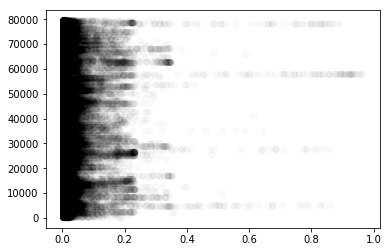

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train_predict.ravel(),range(0,len(y_train_predict)),c=Y_train_binary.ravel(),alpha=0.02, cmap='gray')

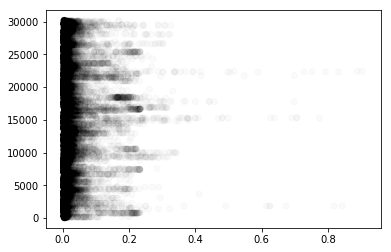

In [117]:
plt.scatter(y_test_predict.ravel(),range(0,len(y_test_predict)),c=Y_test_binary.ravel(),alpha=0.02, cmap='gray')

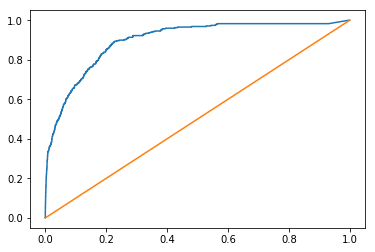

In [118]:
plt.plot(roc_data[0], roc_data[1])
plt.plot(roc_data[1], roc_data[1])
#plt.plot(roc_data[2], roc_data[1])

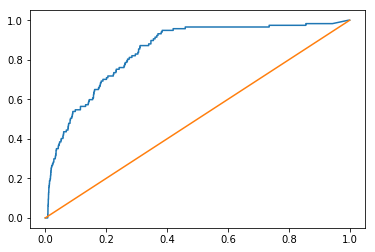

In [119]:
plt.plot(roc_data_test[0], roc_data_test[1])
plt.plot(roc_data_test[1], roc_data_test[1])
#plt.plot(roc_data[2], roc_data[1])

In [120]:
df_egr_train_pred = pd.DataFrame({'pred':y_train_predict.ravel(), 'label': Y_train_binary.ravel()})

In [121]:
df_egr_test_pred = pd.DataFrame({'pred':y_test_predict.ravel(), 'label': Y_test_binary.ravel()})

In [122]:
df_win1 = df_egr_train_pred[df_egr_train_pred['label']>0.5]

In [123]:
df_win1_test = df_egr_test_pred[df_egr_test_pred['label']>0.5]

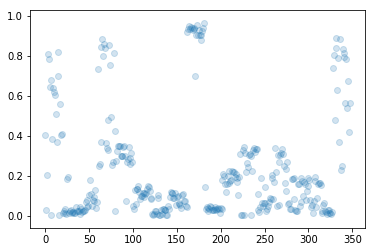

In [149]:
plt.scatter(range(0,len(df_win1['pred'])), df_win1['pred'], alpha=0.2)

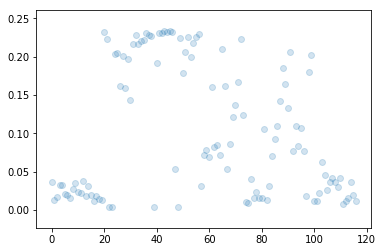

In [151]:
plt.scatter(range(0,len(df_win1_test['pred'])), df_win1_test['pred'], alpha=0.2)

In [126]:
df_win2_test = df_egr_test_pred[df_egr_test_pred['label']<0.5]

In [127]:
df_win2 = df_egr_train_pred[df_egr_train_pred['label']<0.5]

In [128]:
#df_win2_test.describe()

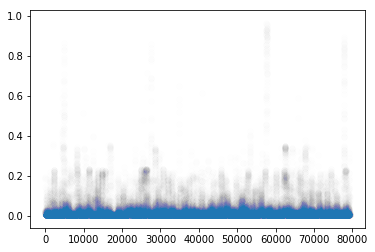

In [152]:
plt.scatter(range(0,len(df_win2['pred'])), df_win2['pred'], alpha=0.002)

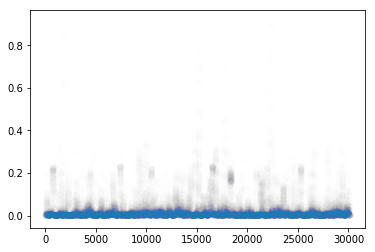

In [153]:
plt.scatter(range(0,len(df_win2_test['pred'])), df_win2_test['pred'], alpha=0.002)

In [131]:
def thres_pred(lis,thres=0.5):
    return list(map(lambda x: 1 if x>=thres else 0, lis))

In [132]:
df_egr_train_pred['pred'], df_egr_train_pred['label']

(0        0.004940
 1        0.008928
 2        0.012322
 3        0.009056
 4        0.017678
 5        0.022897
 6        0.023765
 7        0.020079
 8        0.010701
 9        0.032043
 10       0.016746
 11       0.023289
 12       0.009559
 13       0.022967
 14       0.012777
 15       0.012593
 16       0.028994
 17       0.031589
 18       0.014806
 19       0.017181
 20       0.010106
 21       0.009967
 22       0.019968
 23       0.017842
 24       0.018983
 25       0.030198
 26       0.007955
 27       0.011162
 28       0.029987
 29       0.026658
            ...   
 79581    0.003828
 79582    0.003751
 79583    0.003708
 79584    0.007048
 79585    0.004170
 79586    0.004728
 79587    0.077511
 79588    0.093586
 79589    0.097372
 79590    0.014599
 79591    0.015496
 79592    0.005291
 79593    0.008308
 79594    0.003907
 79595    0.004193
 79596    0.003844
 79597    0.006557
 79598    0.017014
 79599    0.004405
 79600    0.005804
 79601    0.004724
 79602    0.

In [133]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
pr=[]
rec=[]
acc=[]
cm_ls=[]
for thres in roc_data[2]:
    pred_tmp = thres_pred(thres=thres,lis=df_egr_train_pred['pred'] )
    cm_ls.append(cm(df_egr_train_pred['label'], pred_tmp))
    pr.append(precision_score(df_egr_train_pred['label'], pred_tmp))
    rec.append(recall_score(df_egr_train_pred['label'], pred_tmp))
    acc.append(accuracy_score(df_egr_train_pred['label'], pred_tmp))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
prt=[]
rect=[]
acct=[]
cm_lst=[]
for thres in roc_data_test[2]:
    pred_tmp = thres_pred(thres=thres,lis=df_egr_test_pred['pred'] )
    cm_lst.append(cm(df_egr_test_pred['label'], pred_tmp))
    prt.append(precision_score(df_egr_test_pred['label'], pred_tmp))
    rect.append(recall_score(df_egr_test_pred['label'], pred_tmp))
    acct.append(accuracy_score(df_egr_test_pred['label'], pred_tmp))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
max(prt)

0.05

In [136]:
max(acc)

0.9956413058496941

In [137]:
df_egr_train_pred_score = pd.DataFrame({'cm_TN':list(map( lambda x: x[0][0], cm_ls)), 'cm_TP':list(map( lambda x: x[1][1], cm_ls)), 'cm_FN':list(map( lambda x: x[1][0], cm_ls)), 'cm_FP':list(map( lambda x: x[0][1], cm_ls)), 'pr':pr, 'rec':rec, 'acc':acc, 'thres':roc_data[2]})

In [138]:
df_egr_test_pred_score = pd.DataFrame({'cm_TN':list(map( lambda x: x[0][0], cm_lst)), 'cm_TP':list(map( lambda x: x[1][1], cm_lst)), 'cm_FN':list(map( lambda x: x[1][0], cm_lst)), 'cm_FP':list(map( lambda x: x[0][1], cm_lst)), 'pr':prt, 'rec':rect, 'acc':acct, 'thres':roc_data_test[2]})

In [139]:
# df_egr_train_pred_score[df_egr_train_pred_score['cm_FN']<400]
# plt.hist(df_egr_train_pred_score['acc'].values)
(df_egr_train_pred_score[df_egr_train_pred_score['acc']>0.8]).sort_values(['cm_TP','pr'], ascending=False).head(22)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
687,63499,296,52,15764,0.018431,0.850575,0.801334,0.027215
688,63421,296,52,15842,0.018342,0.850575,0.800354,0.027069
689,63419,296,52,15844,0.018340,0.850575,0.800329,0.027064
685,63506,295,53,15757,0.018378,0.847701,0.801409,0.027229
686,63499,295,53,15764,0.018370,0.847701,0.801321,0.027215
683,63539,294,54,15724,0.018354,0.844828,0.801811,0.027302
684,63506,294,54,15757,0.018317,0.844828,0.801397,0.027235
681,63551,293,55,15712,0.018307,0.841954,0.801949,0.027328
682,63539,293,55,15724,0.018293,0.841954,0.801799,0.027304
675,63993,292,56,15270,0.018764,0.839080,0.807489,0.028317


In [140]:
(df_egr_test_pred_score[df_egr_test_pred_score['acc']>0.8]).sort_values(['cm_TP','pr'], ascending=False).head(22)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
177,24414,82,35,5703,0.014175,0.700855,0.810214,0.029642
173,24585,81,36,5532,0.014431,0.692308,0.815836,0.030807
174,24417,81,36,5700,0.014011,0.692308,0.810280,0.029667
175,24415,81,36,5702,0.014007,0.692308,0.810214,0.029656
176,24414,81,36,5703,0.014004,0.692308,0.810181,0.029647
171,24658,80,37,5459,0.014443,0.683761,0.818218,0.031402
172,24585,80,37,5532,0.014255,0.683761,0.815803,0.030808
169,24679,79,38,5438,0.014319,0.675214,0.818879,0.031608
170,24658,79,38,5459,0.014265,0.675214,0.818185,0.031407
165,24768,78,39,5349,0.014373,0.666667,0.821790,0.032271


In [155]:
(df_egr_train_pred_score[df_egr_train_pred_score['pr']>0.1]).sort_values(['cm_TP','acc'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
214,78237,125,223,1026,0.108601,0.359195,0.984311,0.218034
212,78239,124,224,1024,0.108014,0.356322,0.984324,0.218121
213,78237,124,224,1026,0.107826,0.356322,0.984299,0.218051
210,78298,123,225,965,0.113051,0.353448,0.985052,0.220824
211,78239,123,225,1024,0.107236,0.353448,0.984311,0.218143
208,78306,122,226,957,0.113068,0.350575,0.985140,0.221184
209,78298,122,226,965,0.112236,0.350575,0.985040,0.220964
206,78309,121,227,954,0.112558,0.347701,0.985165,0.221714
207,78306,121,227,957,0.112245,0.347701,0.985128,0.221301
204,78349,120,228,914,0.116054,0.344828,0.985655,0.223590


In [142]:
(df_egr_test_pred_score[df_egr_test_pred_score['pr']>0.04199]).sort_values(['cm_TP','acc'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
59,29404,32,85,713,0.042953,0.273504,0.973606,0.191404
57,29480,31,86,637,0.046407,0.264957,0.976087,0.197092
55,29520,30,87,597,0.047847,0.256410,0.977376,0.199501
56,29480,30,87,637,0.044978,0.256410,0.976053,0.197181
53,29541,29,88,576,0.047934,0.247863,0.978038,0.201123
54,29520,29,88,597,0.046326,0.247863,0.977343,0.199509
51,29555,28,89,562,0.047458,0.239316,0.978468,0.202761
52,29541,28,89,576,0.046358,0.239316,0.978005,0.201291
49,29570,27,90,547,0.047038,0.230769,0.978931,0.203910
50,29555,27,90,562,0.045840,0.230769,0.978435,0.202853


In [143]:
(df_egr_train_pred_score[df_egr_train_pred_score['rec']>0.7]).sort_values(['acc'], ascending=False).head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
507,69965,244,104,9298,0.025571,0.701149,0.881901,0.051314
509,69842,245,103,9421,0.025347,0.704023,0.880368,0.050644
508,69842,244,104,9421,0.025246,0.701149,0.880356,0.050655
510,69648,245,103,9615,0.024848,0.704023,0.877931,0.049570
511,69646,245,103,9617,0.024843,0.704023,0.877906,0.049567


In [144]:
(df_egr_test_pred_score[df_egr_test_pred_score['rec']>0.5]).sort_values(['acc'], ascending=False).head()

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
115,27625,59,58,2492,0.023128,0.504274,0.915658,0.076683
117,27500,60,57,2617,0.022413,0.512821,0.911557,0.072309
116,27500,59,58,2617,0.022048,0.504274,0.911523,0.072317
119,27447,61,56,2670,0.022336,0.521368,0.909837,0.071215
118,27447,60,57,2670,0.021978,0.512821,0.909804,0.071264


Text(0, 0.5, 'Precision')

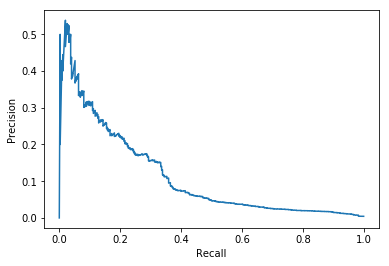

In [145]:
plt.plot(df_egr_train_pred_score['rec'], df_egr_train_pred_score['pr'])
plt.xlabel('Recall')
plt.ylabel('Precision')

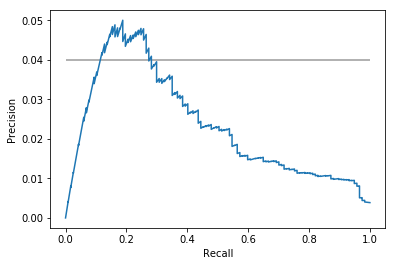

In [146]:
plt.plot(df_egr_test_pred_score['rec'], df_egr_test_pred_score['pr'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.hlines(0.04, 0.0, 1.0, alpha=0.4)

In [147]:
(df_egr_test_pred_score[df_egr_test_pred_score['acc']>0.6]).sort_values(['cm_TP','rec'], ascending=False).head(10)

,cm_TN,cm_TP,cm_FN,cm_FP,pr,rec,acc,thres
297,18550,111,6,11567,0.009505,0.948718,0.617219,0.010992
298,18243,111,6,11874,0.009262,0.948718,0.607065,0.010532
299,18241,111,6,11876,0.009260,0.948718,0.606999,0.010528
300,18227,111,6,11890,0.009249,0.948718,0.606536,0.010513
301,18225,111,6,11892,0.009248,0.948718,0.606470,0.010513
302,18132,111,6,11985,0.009177,0.948718,0.603394,0.010356
303,18130,111,6,11987,0.009175,0.948718,0.603327,0.010355
295,18651,110,7,11466,0.009502,0.940171,0.620527,0.011147
296,18550,110,7,11567,0.009420,0.940171,0.617186,0.010992
285,18970,109,8,11147,0.009684,0.931624,0.631045,0.011630


In [318]:
(X_test_list[0].shape)

(469, 335)

In [314]:
X_test.columns

Index(['distance_idle%', 'distance_overrun%', 'distance_decel%',
       'distance_accel%', 'distance_cruise%', 'statedwell_km', 'time_idle%',
       'time_overrun%', 'time_decel%', 'time_accel%',
       ...
       'FUEL_CONSUM_kurtosis', 'FUEL_CONSUM_skewness',
       'VEHICAL_BATTERY_POTENTIAL_mean', 'VEHICAL_BATTERY_POTENTIAL_median',
       'VEHICAL_BATTERY_POTENTIAL_variance', 'VEHICAL_BATTERY_POTENTIAL_max',
       'VEHICAL_BATTERY_POTENTIAL_min', 'VEHICAL_BATTERY_POTENTIAL_max-min',
       'VEHICAL_BATTERY_POTENTIAL_kurtosis',
       'VEHICAL_BATTERY_POTENTIAL_skewness'],
      dtype='object', length=269)

In [156]:
df_egr_train_pred.shape

(79611, 2)

In [157]:
len(df_egr_test_pred)

30234

In [ ]:
# veh count
points=0
flen=0
fc=0
TN=0
TP=0
FP=0
FN=0
OT= 0.111 #0.203328

l_TN=[]
l_TP=[]
l_FN=[]
l_FP=[]
l_OT=[]
for OT in range(0,100):
    
    for df1 in X_test_list[0:]: # X_train_list

        __x=df1[col_list].copy()
        __x.fillna(method='ffill', inplace=True)
        __x.fillna(method='bfill', inplace=True)
        __x.fillna(value=0, inplace=True)
        if(len(__x)>0): 
            _x = scaler.transform(__x)
            # output in test mode = 0
            bottleneck_output = encoder_model.predict(_x)  # bottleneck representation
            y_pred = Clf_egr_v2.predict(bottleneck_output)

            df2=pd.DataFrame(y_pred)
            #points=points+len(y_pred)
            #if (min(df2[0])<= 0.966): l1[vin]=1-min(df2[0])
            df3=df1[df1['ANN_Radiator']!='N'][['statedwell_km']] 
            df3['Measurement in KM'] = df3['statedwell_km']

            if(len(df3)==0):
                if(df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].shape[0]==0): TN+=1
                else: FP+=1
            else: 
                if((df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].min() <= df3['Measurement in KM'].min() ) & (df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].min() )): TP+=1
                elif((df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].min() <= df3['Measurement in KM'].max() ) & (df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].max()+25000 >= df3['Measurement in KM'].max() )): TP+=1 
                elif(df1.iloc[(df2[df2[0]>OT][0]).index]['statedwell_km'].shape[0]==0): FN+=1
                else: FN+=1

            #print(vin)
            #flen=flen+(len(df3['Measurement in KM'].unique()))
            fc=fc+1
        l_TN.append(TN)
        l_TP.append(TP)
        l_FN.append(FN)
        l_FP.append(FP)
        l_OT.append(OT/100)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/ec2-user/anaco

In [ ]:
len(l_FP)

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.111

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.12

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.203328

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.230706

In [ ]:
print(TN, TP, FN, FP ) # test set @ 0.590117

In [389]:
print(TN, TP, FN, FP ) # tr .113

110 7 33 24


In [407]:
print(TN, TP, FN, FP ) # train set @ 0.1105#001

0 40 0 134


In [376]:
print(TN, TP, FN, FP ) # train set @ 0.176299 

114 5 35 20


In [378]:
print(TN, TP, FN, FP ) # train set @ 0.239928 

114 5 35 20


In [373]:
print(TN, TP, FN, FP ) # train set @ 0.351392

123 3 37 11


0

In [160]:
__x.fillna(method='ffill', inplace=True)
__x.fillna(method='bfill', inplace=True)
__x.fillna(value=0, inplace=True)
__x.dropna().shape

(83, 230)

In [370]:
(__x.describe().iloc[0]).sort_values(ascending=True)

power[75,inf]_min                       0.0
power[75,inf]_median                    0.0
power[75,inf]_kurtosis                  0.0
power[75,inf]_skewness                  0.0
power[75,inf]_mean                      0.0
power[75,inf]_variance                  0.0
power[75,inf]_max                       0.0
power[-inf,-10]_max-min               429.0
power[-10,0]_variance                 429.0
power[-10,0]_median                   429.0
power[-10,0]_mean                     429.0
power[-10,0]_count                    429.0
EFF_TORQUE_mean                       429.0
EFF_TORQUE_median                     429.0
EFF_TORQUE_variance                   429.0
EFF_TORQUE_max                        429.0
EFF_TORQUE_min                        429.0
EFF_TORQUE_max-min                    429.0
EFF_TORQUE_kurtosis                   429.0
EFF_TORQUE_skewness                   429.0
power[-inf,-10]_kurtosis              429.0
Power_mean                            429.0
Power_variance                  

In [4]:
bucket="relai.poc.temp"
file_extn='.csv'
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from d2 import get_vin_list
f1=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading source
#'s3://{}/{}{}.csv'.format(bucket,'res/1',vin)
setA=set(list(pd.read_csv('ANOVA_EGR.csv')['Feature'])[0:54] ) 
setB=set(['power[0,25]_count %', 'power[75,inf]_count %', 'power[25,75]_count %'])
col_list = list(setA-setB)  # Annova top 51
             
# predictions
from keras import backend as K# with a Sequential model
ib=1
get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[ib].output])


In [10]:
f1=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading source
for vin in f1[0:]:
    df1=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',vin))
    #df1.columns=[str(i) for i in (df1.columns)]
    c_df3=0
    try:
        df3=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'jcd/',vin))
        c_df3=1
    except:
        c_df3=0
    # y_pred = autoencoder_egr.predict()  # Reconstruction
    try:
        _x=df1[col_list]
        # output in test mode = 0
        bottleneck_output = get_layer_output([_x,0])[0]  # bottleneck representation
        y_pred = predictor_egr.predict(bottleneck_output)
        df2=pd.DataFrame(y_pred)
        '''
        df1=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',vin))
        df2=pd.DataFrame(y_pred)
        df3=pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'jcd/',vin))
        '''
        plt.figure()
        try: sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], alpha=0.8,legend=False)
        except: pass
        if (c_df3==1): plt.vlines(df3['Measurement in KM'],0,1)
        plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
        #plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
        ax2=plt.twinx()
        ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], 1-df2[df2[0]<0.966][0], alpha=0.4)
        ax2.set_ylim(0,1)
        plt.legend().set_visible(False)
        plt.title('EGR failure prediction for {}'.format(vin))
        doc = 'temp.png'
        plt.savefig(doc)
        from boto3 import resource
        s3 = resource('s3')
        from os import remove
        s3.Bucket(bucket).Object('res/8/{}.png'.format(vin)).upload_file(doc)
        remove(doc)
        plt.clf()
        print(vin)
    except: pass

MB1A3CHD2JAEH9187
MB1A3EHD2JPGC1112
MB1A3EHD3JPBE1810
MB1A3EHD5JAGH5930
MB1A3EHDXJAHH5103
MB1CTCFD0HAEG4824
MB1CTCFD3HAEG4803
MB1CTCFD6HAEG4844
MB1CTCHD0HAJH3802
MB1CTCHD0HAVH2225
MB1CTCHD0HEXZ0162
MB1CTCHD0JPAE7090
MB1CTCHD0JPHB6359
MB1CTCHD1HEXY9828
MB1CTCHD1JPGB8828
MB1CTCHD2HAVH2209
MB1CTCHD2HEVZ4367
MB1CTCHD3HEVZ3678
MB1CTCHD3HPWA4775
MB1CTCHD4HAAG7582


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


MB1CTCHD4HPWA5613
MB1CTCHD4JADJ1242
MB1CTCHD5HPJB2216
MB1CTCHD5JPEC8773
MB1CTCHD6JPEC8779
MB1CTCHD6JPEC8782
MB1CTCHD6JPEC9172
MB1CTCHD7JAGH6526
MB1CTCHD8HPWA3573
MB1CTCHD8JPEC8783
MB1CTCHD9HPWA4778
MB1CTCHD9JAHH4408
MB1CTCHD9JPEC9005
MB1CTCHD9JPGC1217
MB1JADHD0JRGW0273
MB1KACFD7HPGX1732
MB1KACHD0JPHB8128
MB1KACHD1JRGW2953
MB1KACHD2HEVZ4497
MB1KACHD2JPGC2162
MB1KACHD3HAJH3312
MB1KACHD3JPGC1778
MB1KACHD4HRWU7757
MB1KACHD4JRHV9161
MB1KACHD5HEJZ5499
MB1KACHD6HEJZ5205
MB1KACHD6HRWU6299
MB1KACHD6JRFW8650
MB1KACHD6JRGW3886
MB1KACHD6JRHV7539
MB1KACHD6JRHV9534
MB1KACHD7HEVZ2552
MB1KACHD7HPJB3207
MB1KACHD8HRWU7762
MB1KACHD8JPHB4554
MB1KACHD8JPHB6241
MB1KACHD9JPGB9890
MB1KACHD9JRHV8880
MB1KACHDXHAVH2301
MB1KACHDXJRHV9455
MB1KADYD2HPEY0142
MB1NACHD0HAVH1462
MB1NACHD0HPXA1107
MB1NACHD0JAHH4327
MB1NACHD0JRHV6500
MB1NACHD1HRVV1159
MB1NACHD2HRVU8948
MB1NACHD2HRWU8175
MB1NACHD3HPVA6182
MB1NACHD4JAHH4217
MB1NACHD4JPHB7061
MB1NACHD5HPWA3996
MB1NACHD5JEGZ9945
MB1NACHD6HPJA9422
MB1NACHD7HRVV1456
MB1NACHD7J

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
vin#pd.read_csv('s3://{}/{}{}.csv'.format(bucket,'res/1/',f1[1])) #list(df1.columns)#=[str(i) for i in (df1.columns)]

'MB1A3CHD8JEHZ9434'

In [193]:
# (df2[df2[0]<0.966][0])

Text(0.5, 1.0, 'EGR failure prediction for MB1CTCHD0HAVH2225')

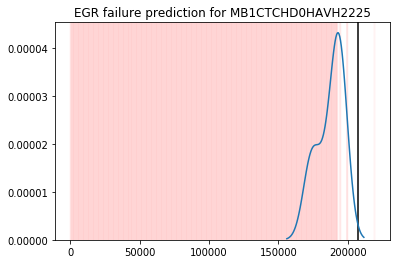

In [170]:
'''
sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'])
plt.vlines(df3['Measurement in KM'],0,1)
#plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
plt.legend().set_visible(False)
plt.title('EGR failure prediction for {}'.format(vin))
'''

(0, 1)

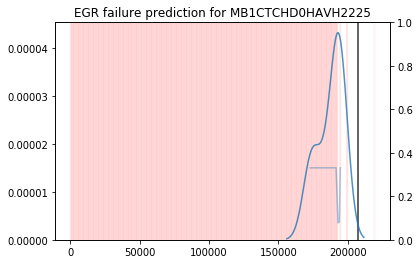

In [201]:
sns.kdeplot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], alpha=0.8)
plt.vlines(df3['Measurement in KM'],0,1, alpha=0.8)
#plt.vlines(df1[np.isnan(df2[0])]['statedwell_km'],0,1, colors='red', alpha=0.05) #'ENGINE_SPEED_x_count',
plt.vlines(df1[df1['ENGINE_SPEED_x_count']<5]['statedwell_km'],0,1, colors='red', alpha=0.03) #
plt.legend().set_visible(False)
plt.title('EGR failure prediction for {}'.format(vin))
ax2=plt.twinx()
ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], 1-df2[df2[0]<0.966][0], alpha=0.4)
ax2.set_ylim(0,1)
#ax2.plot(df1.iloc[(df2[df2[0]<0.966][0]).index]['statedwell_km'], df2[df2[0]<0.966][0])


In [39]:
#bottleneck
autoencoder_egr.get_layer('bottleneck').shape

In [85]:
from keras import backend as K
# with a Sequential model
get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[1].output])
# output in test mode = 0
x=df1[col_list].head(2)
bottleneck_output = get_layer_output([x])[0]

In [86]:
layer_output

array([[-1.,  1., -1.,  1.,  1.,  1., -1., -1.],
       [nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [58]:
#autoencoder_egr.get_config()

In [62]:
 for i in range(0,4):
    get_layer_output = K.function([autoencoder_egr.layers[0].input], [autoencoder_egr.layers[i].output])
    # output in test mode = 0
    x=df1[col_list].head(1)
    layer_output = get_layer_output([x,0])[0]
    print(i, layer_output.shape)

0 (1, 16)
1 (1, 8)
2 (1, 16)
3 (1, 51)


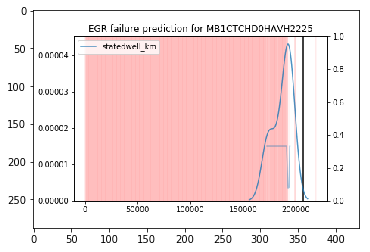

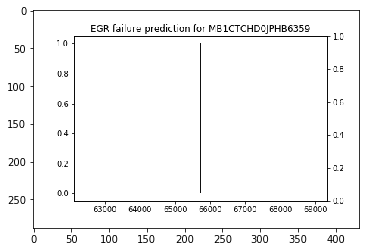

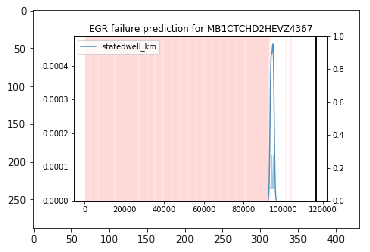

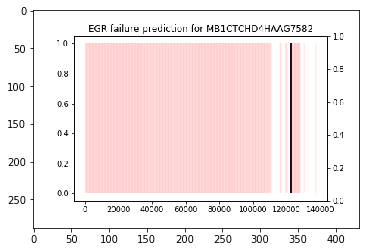

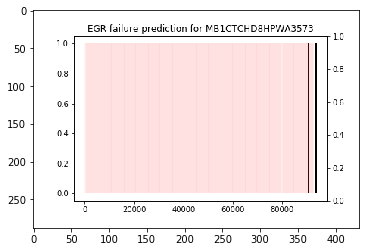

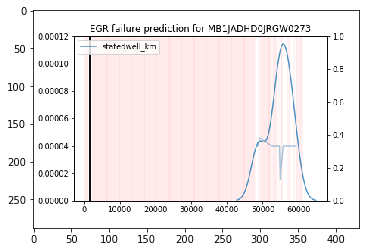

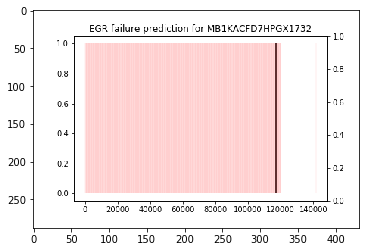

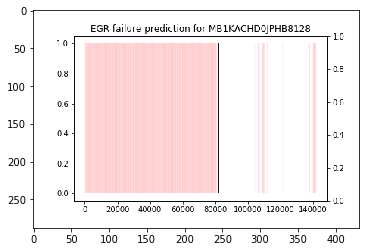

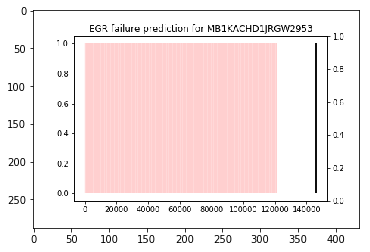

In [269]:
#f6=get_vin_list(bucket=bucket, folder_base='res/7/', file_extn='.png')  #reading source
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import boto3
import io
import tempfile
bucket="relai.poc.temp"
s3 = boto3.resource('s3', region_name='us-east-1')
bucket = s3.Bucket(bucket)
for i in f6[0:9]:
    #print('s3://{}/res/7/{}.png'.format(bucket,i))
    #plt.imread('s3://{}/res/7/{}.png'.format(bucket,i))
    object = bucket.Object('res/7/{}.png'.format(i))
    file_stream = io.BytesIO()
    object.download_fileobj(file_stream)
    #img = plt.imread(file_stream)
    #plt.imshow(img)
    tmp = tempfile.NamedTemporaryFile()
    with open(tmp.name, 'wb') as f:
        object.download_fileobj(f)
        img=mpimg.imread(tmp.name)
        plt.imshow(img)
        # ...Do jobs using img
    plt.show()
    